In [ ]:
import pandas as pd#data processing
import numpy as np
import matplotlib.pyplot as plt#Matplotlib includes the image module for image manipulation
import matplotlib.image as mpimg
import seaborn as sns#Seaborn provides a high-level interface for drawing attractive and informative statistical graphics.
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools#The itertools module includes a set of functions for working with iterable (sequence-like) data sets.

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D#1)Dense layer is the regular deeply connected neural network layer.
#Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly,2)Flattens the input. Does not affect the batch size.
#Max pooling operation for 2D spatial data.
from keras.optimizers import RMSprop #An optimizer is one of the two arguments required for compiling a Keras model
from keras.preprocessing.image import ImageDataGenerator#Generate batches of tensor image data with real-time data augmentation.
from keras.callbacks import ReduceLROnPlateau#Reduce learning rate when a metric has stopped improving.


sns.set(style='white', context='notebook', palette='deep')

# Load data

In [ ]:
# Load the data
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")

In [ ]:
#test.describe()

In [ ]:
#train.describe()

In [ ]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

#  **Check for null and missing values**

In [ ]:
# Check the data
X_train.isnull().any().describe()

In [ ]:
test.isnull().any().describe()


# Normalization the data



the goal of data normalization is to reduce and even eliminate data redundancy,also is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information,
The data must be preprocessed before training the network. If you inspect the image , you will see that the pixel values fall in the range of 0 to 255:
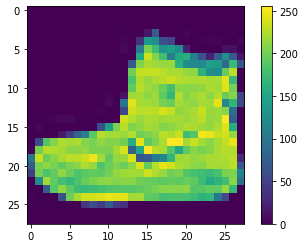

In [ ]:
# Normalize the data
X_train = X_train / 255.0#the CNN converg faster on [0..1] data than on [0..255]
test = test / 255.0

#  Reshape

The reshape() function is used to give a new shape to an array without changing its data.



In [ ]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , chanal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
#Train and test images (28px x 28px) has been stock into pandas.Dataframe as 1D vectors of 784 values. We reshape all data to 28x28x1 3D matrices.


In [ ]:
# Some examples
g = plt.imshow(X_train[1][:,:,0])

# Label encoding

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.




In [ ]:
# Labels are 10 digits numbers from 0 to 9.Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)


# Split training and valdiation set

I choosed to split the train set in two parts : a small fraction (10%) became the validation set which the model is evaluated and the rest (90%) is used to train the model.

In [ ]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

In [ ]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


**Optimizer ensure the model reaches the optimium faster.**

RMSProp optimizer makes the model converge more effectively and faster. It also stricts the model to coverge at global minimum therefore the accuracy of the model will be higher. 


In [ ]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [ ]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

learning_rate range between 0.0 and 1.0



By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.
verbose=0 will show you nothing (silent)
verbose=1 will show you an animated progress bar like this:
 


In [ ]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3,verbose=1,factor=0.5,min_lr=0.00001)

# when min_lr is =0.05 Epoch 1/2
439/439 - 151s - loss: 0.4155 - accuracy: 0.8663 - val_loss: 0.0629 - val_accuracy: 0.9829
# Epoch 2/2
439/439 - 146s - loss: 0.1300 - accuracy: 0.9615 - val_loss: 0.0609 - val_accuracy: 0.9848

In [ ]:
epochs = 2# Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

# Without data augmentation i obtained an accuracy of 98.114%
# With data augmentation i achieved 99.67% of accuracy

In [ ]:
# Without data augmentation i obtained an accuracy of 0.98114
#history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
#          validation_data = (X_val, Y_val), verbose = 2)

In [ ]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)


print(datagen)

Randomly rotate some training images by 10 degrees

Randomly Zoom by 10% some training images

Randomly shift images horizontally by 10% of the width

Randomly shift images vertically by 10% of the height

I did not apply a vertical_flip nor horizontal_flip since it could have lead to misclassify symetrical numbers such as 6 and 9.

Once our model is ready, we fit the training dataset .


In [ ]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])#CB=Reduce learning rate when a metric has stopped improving.

In [ ]:
# Plot the loss and accuracy curves for training and validation 

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='red', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='blue', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='red',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

 ****Confusion matrix can be very helpfull to see your model drawbacks.
 
****I plot the confusion matrix of the validation results.

In [ ]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_true,Y_pred_classes))#, target_names=target_names))

# Let's investigate for errors.

I want to see the most important errors . the difference between the probabilities of real value and the predicted ones in the results.

In [ ]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [ ]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

print(results)

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)